In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("austo_automobile.csv")

In [3]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


## Checking for duplicated rows

In [6]:
dups = df.duplicated()
dups.sum()

0

### -> All the columns have expected data type and no duplicates there.

In [7]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

### -> 'Gender' and 'Partner_salary' has null values which needs looking at.

#### Going in order and making sure all the data is clean and performing the univariate analysis.  
### 1) Age

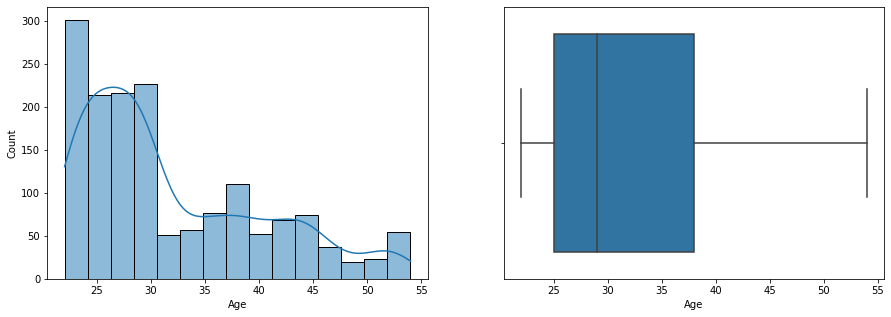

In [8]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df['Age'], kde=True, ax=axes[0])
sns.boxplot(x='Age', data=df, ax=axes[1])
plt.show()

### -> Distribution seems to be appropriate. No Junk Values suspected. 
## [Insight]  Younger people 22-30 Years of age seem to buy significantly more cars than the people in the age range of 30-54. More than 75% of the cars have been sold to people who are <=38 years of age. 
## 2) Gender

In [9]:
df['Gender'].value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

### -> Filling Null values with Male as it is the mode. Correcting typos.

In [10]:
df[df['Gender'].isnull()] = 'Male'
df[(df['Gender'] == 'Femal') | (df['Gender'] == 'Femle')] = 'Female'
df['Gender'].value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

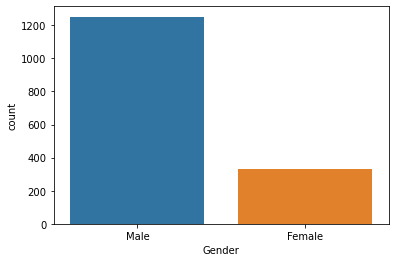

In [11]:
sns.countplot(x='Gender', data=df)

## [Insight] Men seem to buy more cars as compared to women.

## 3) Profession 

In [12]:
df['Profession'].value_counts()

Salaried    863
Business    663
Male         53
Female        2
Name: Profession, dtype: int64

### -> As the number of Salaried Employees and Business Profesionals are almost comparable in the data, chosing not to substitute any value, rather dropping columing with inappropriate values.

In [13]:
df.drop(df[(df['Profession'] == 'Male') | (df['Profession'] == 'Female')].index, axis=0, inplace=True)

In [14]:
df['Profession'].value_counts()

Salaried    863
Business    663
Name: Profession, dtype: int64

## 4) Marital Status

In [15]:
df['Marital_status'].value_counts()

Married    1393
Single      133
Name: Marital_status, dtype: int64

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

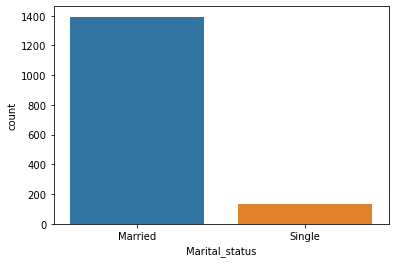

In [16]:
sns.countplot(x='Marital_status', data=df)

## [Insight] Most of the people who are married buy a car.
## 5) Education

In [17]:
df['Education'].value_counts()

Post Graduate    949
Graduate         577
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

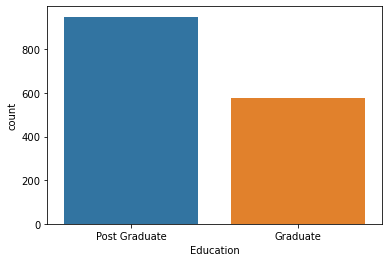

In [18]:
sns.countplot(x='Education', data=df)

## [Insight] More qualified people tend to buy more cars.
## 6) No of Dependents

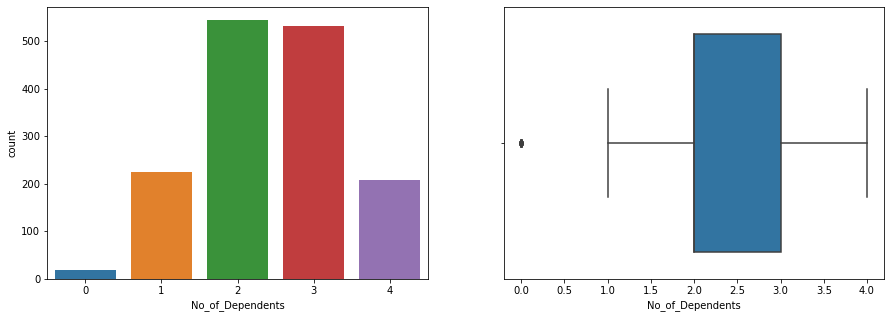

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.countplot(x='No_of_Dependents', data=df, ax=axes[0])
sns.boxplot(x='No_of_Dependents', data=df, ax=axes[1])
plt.show()

## [Insight] Most number of people have 2 to 3 dependants. Followed by 1 and 4. It is safe to assume people with 0 dependants don't buy cars frequently.
### -> 0 even though seems to an outlier here but deciding not to treat it as it might result in loss of valueable insights that can be drawn. 
## 7) Personal Loan

In [20]:
df['Personal_loan'].value_counts()

Yes    767
No     759
Name: Personal_loan, dtype: int64

## 8) House Loan

In [21]:
df['House_loan'].value_counts()

No     1016
Yes     510
Name: House_loan, dtype: int64

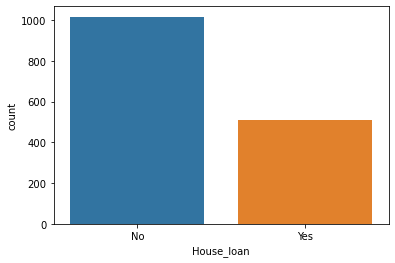

In [22]:
sns.countplot(x='House_loan', data=df);

## [Insight] People are more likely to buy a car if they do not have a 'House Loan'. 

## 9) Partner Working 

In [23]:
df['Partner_working'].value_counts()

Yes    836
No     690
Name: Partner_working, dtype: int64

## [Insight] People whose partner is working tend to buy more cars.

### Additional check to make sure the consistency of data. (Fields with Partner Working as Yes should definitely have Marital Status field as Married.)

In [24]:
df[df['Partner_working'] == 'Yes']['Marital_status'].value_counts()

Married    836
Name: Marital_status, dtype: int64

## 10) Salary

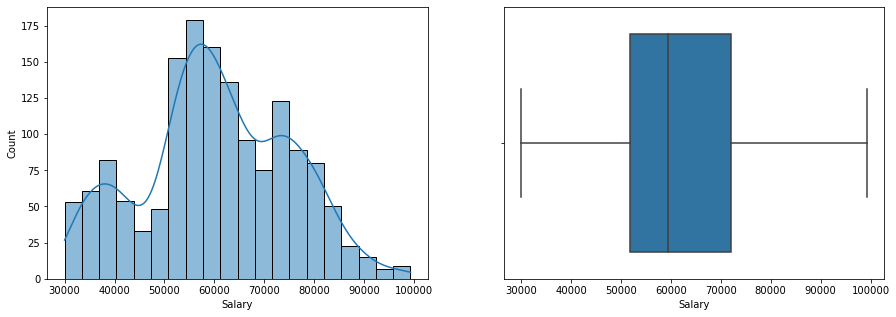

In [25]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df['Salary'], kde=True, ax=axes[0])
sns.boxplot(x='Salary', data=df, ax=axes[1])
plt.show()

### -> Salary is uniformly distributed with Median Salary at around 60000.

## 11) Price

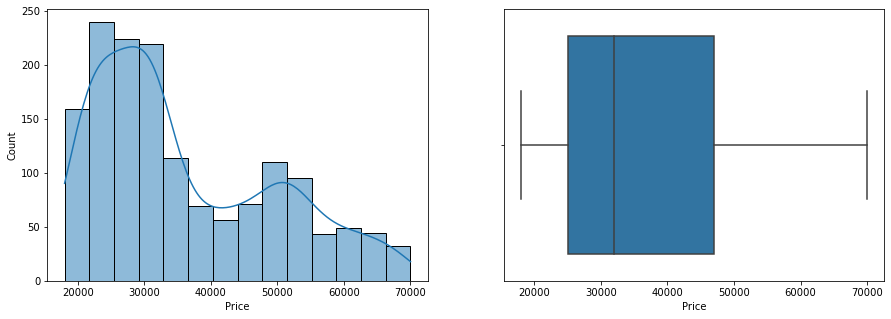

In [26]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df['Price'], kde=True, ax=axes[0])
sns.boxplot(x='Price', data=df, ax=axes[1])
plt.show()

## [Insight] There is more demand for economical cars (costing <=32000)

## 12) Partner Salary

In [27]:
df[df['Partner_salary'].isnull()]['Partner_working'].value_counts()

No     87
Yes    16
Name: Partner_working, dtype: int64

#### Checking and making sure that salary of all ther partners is 0 who are marked as Not Working.

In [28]:
df[df['Partner_working'] == 'No']['Partner_salary'].unique()

array([0.0, nan], dtype=object)

### Filling the value as 0 for the partners who are not working.

In [29]:
df.loc[df['Partner_working'] == 'No', ['Partner_salary']] = 0.0

In [30]:
df[df['Partner_working'] == 'No']['Partner_salary'].unique()

array([0.0], dtype=object)

In [31]:
df[df['Partner_salary'].isnull()]['Partner_working'].value_counts()

Yes    16
Name: Partner_working, dtype: int64

### Filling the Total Salary - Salary where working partners salary is missing.

In [32]:
df['Partner_salary'].fillna(df['Total_salary']-df['Salary'], inplace=True)

In [33]:
df['Partner_salary'].isnull().sum()

0

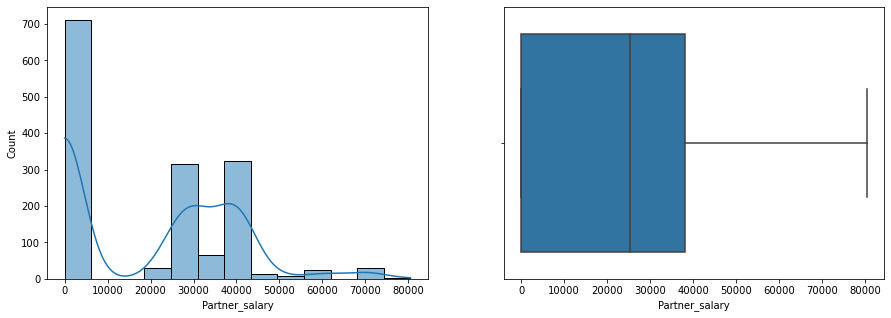

In [34]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df['Partner_salary'], kde=True, ax=axes[0])
sns.boxplot(x='Partner_salary', data=df, ax=axes[1])
plt.show()

## 13) Total Salary

In [35]:
df[ df['Total_salary'] != df['Salary'] + df ['Partner_salary']]['Total_salary'].count()

0

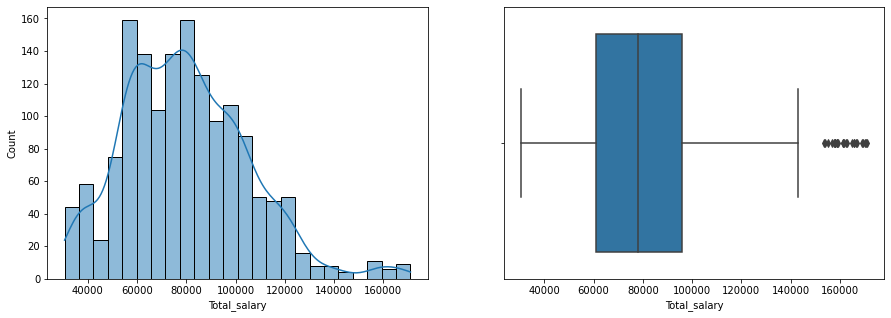

In [36]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df['Total_salary'], kde=True, ax=axes[0])
sns.boxplot(x='Total_salary', data=df, ax=axes[1])
plt.show()

### Since Total_salary is a derived column, leaving the outliers as is. We can cap the outliers at UW + 1.5*IOR if there is a requirement for later ML applications.

## 14) Make

In [37]:
df['Make'].value_counts()

Sedan        657
Hatchback    580
SUV          289
Name: Make, dtype: int64

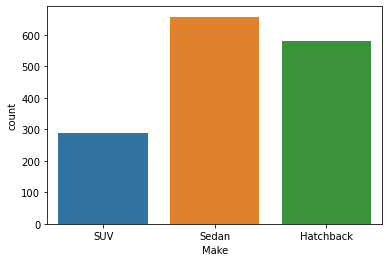

In [38]:
sns.countplot(x='Make', data=df);

## [Insight] Sedans are most popular. Followed by Hatchbacks and then by SUVs.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1526 non-null   object 
 1   Gender            1526 non-null   object 
 2   Profession        1526 non-null   object 
 3   Marital_status    1526 non-null   object 
 4   Education         1526 non-null   object 
 5   No_of_Dependents  1526 non-null   object 
 6   Personal_loan     1526 non-null   object 
 7   House_loan        1526 non-null   object 
 8   Partner_working   1526 non-null   object 
 9   Salary            1526 non-null   object 
 10  Partner_salary    1526 non-null   float64
 11  Total_salary      1526 non-null   object 
 12  Price             1526 non-null   object 
 13  Make              1526 non-null   object 
dtypes: float64(1), object(13)
memory usage: 178.8+ KB


In [40]:
df['Age'] = df['Age'].astype('int64')
df['No_of_Dependents'] = df['No_of_Dependents'].astype('int64')
df['Salary'] = df['Salary'].astype('float64')
df['Total_salary'] = df['Total_salary'].astype('float64')
df['Price'] = df['Price'].astype('float64')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1526 non-null   int64  
 1   Gender            1526 non-null   object 
 2   Profession        1526 non-null   object 
 3   Marital_status    1526 non-null   object 
 4   Education         1526 non-null   object 
 5   No_of_Dependents  1526 non-null   int64  
 6   Personal_loan     1526 non-null   object 
 7   House_loan        1526 non-null   object 
 8   Partner_working   1526 non-null   object 
 9   Salary            1526 non-null   float64
 10  Partner_salary    1526 non-null   float64
 11  Total_salary      1526 non-null   float64
 12  Price             1526 non-null   float64
 13  Make              1526 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 178.8+ KB


In [42]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1526.0,NaN,NaN,NaN,31.994758,8.437619,22.0,25.0,29.0,38.0,54.0
Gender,1526,2,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1526,2,Salaried,863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1526,2,Married,1393,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1526,2,Post Graduate,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1526.0,NaN,NaN,NaN,2.44692,0.942686,0.0,2.0,2.0,3.0,4.0
Personal_loan,1526,2,Yes,767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1526,2,No,1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1526,2,Yes,836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1526.0,NaN,NaN,NaN,60424.180865,14662.791936,30000.0,51900.0,59500.0,72000.0,99300.0


In [43]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

##1D  
Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data. 

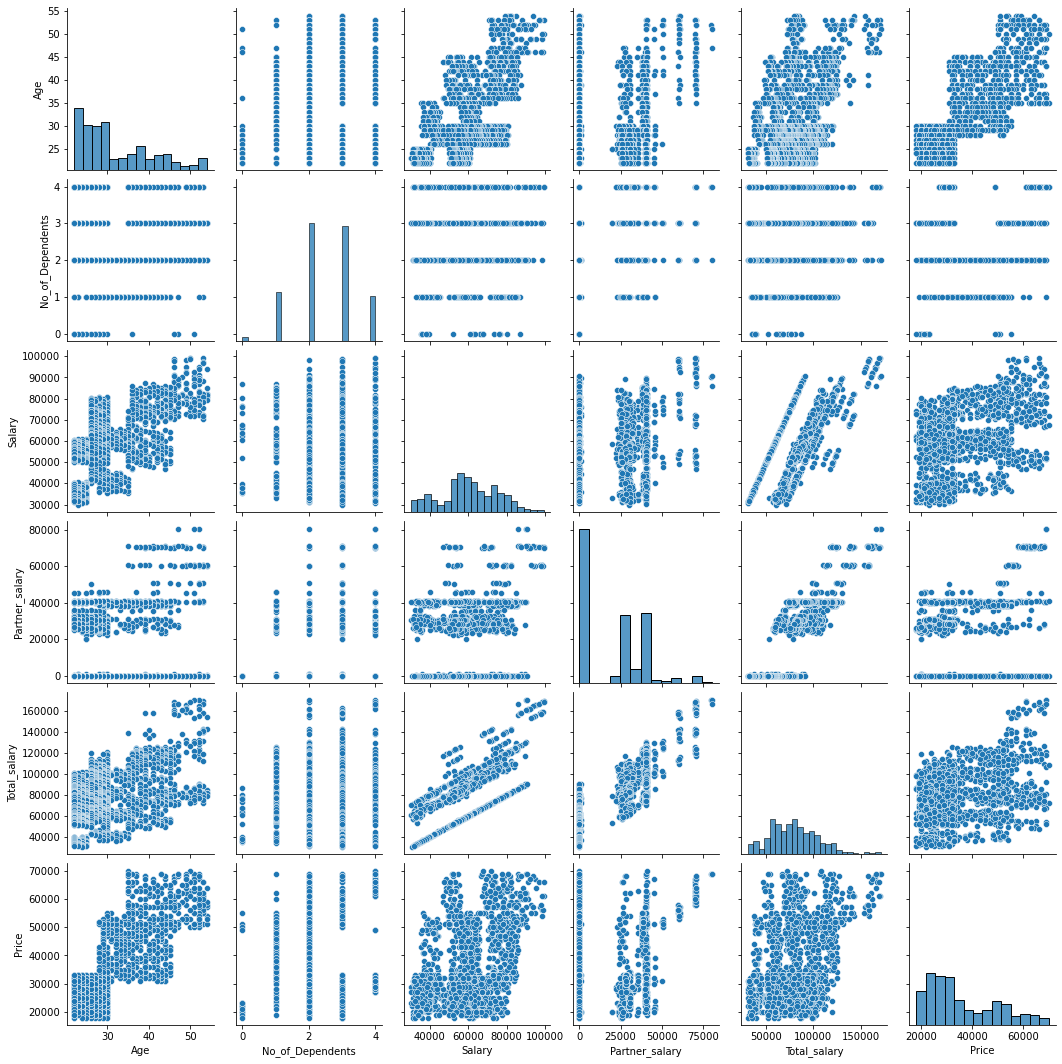

In [44]:
sns.pairplot(df)

In [45]:
df.corr()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Age,1.000000,-0.189814,0.617753,0.131799,0.457285,0.798096
No_of_Dependents,-0.189814,1.000000,-0.042511,0.144430,0.087140,-0.129597
Salary,0.617753,-0.042511,1.000000,0.080838,0.637846,0.409807
Partner_salary,0.131799,0.144430,0.080838,1.000000,0.819205,0.161824
Total_salary,0.457285,0.087140,0.637846,0.819205,1.000000,0.360837
Price,0.798096,-0.129597,0.409807,0.161824,0.360837,1.000000


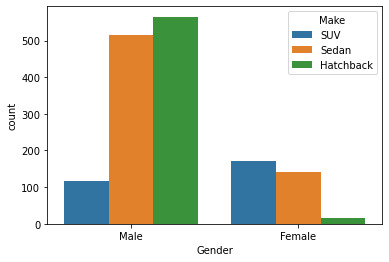

In [46]:
sns.countplot(data=df, x='Gender', hue='Make');

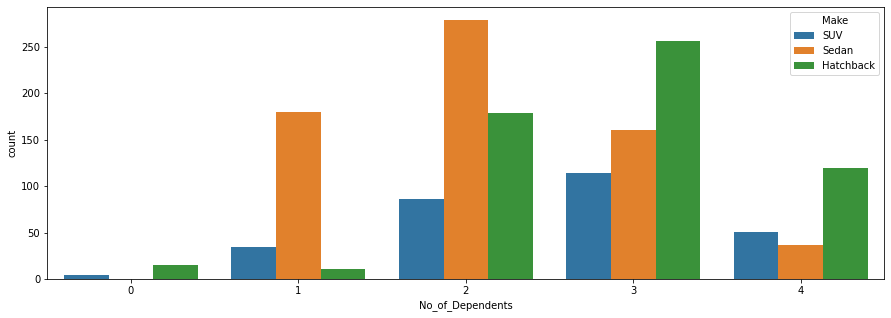

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='No_of_Dependents', hue='Make');

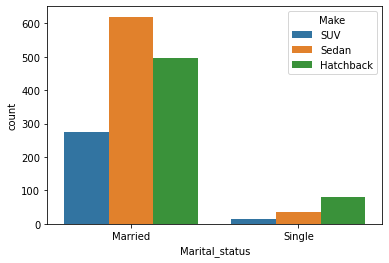

In [48]:
sns.countplot(data=df, x='Marital_status', hue='Make');

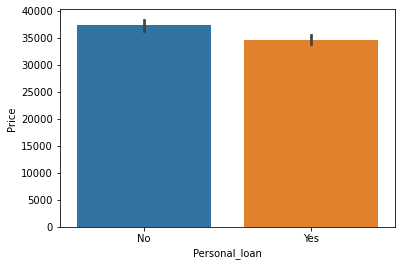

In [49]:
sns.barplot(data=df, x='Personal_loan', y='Price');

<AxesSubplot:xlabel='Gender', ylabel='Age'>

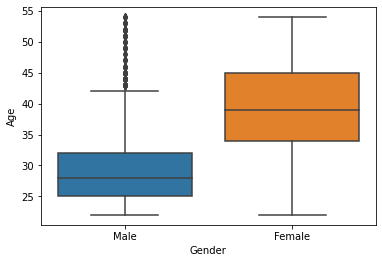

In [50]:
sns.boxplot(data=df, x='Gender', y='Age')

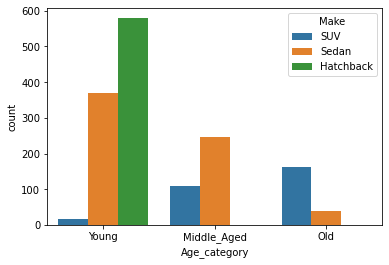

In [51]:
df['Age_category'] = pd.cut(df['Age'],bins=3, labels=['Young','Middle_Aged','Old'])
sns.countplot(data=df, x='Age_category', hue='Make');

<AxesSubplot:xlabel='Age', ylabel='Price'>

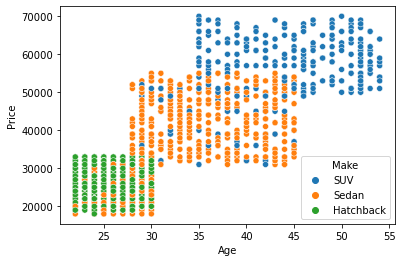

In [52]:
sns.scatterplot(data=df, x='Age', y='Price', hue='Make')

<AxesSubplot:xlabel='Salary', ylabel='Price'>

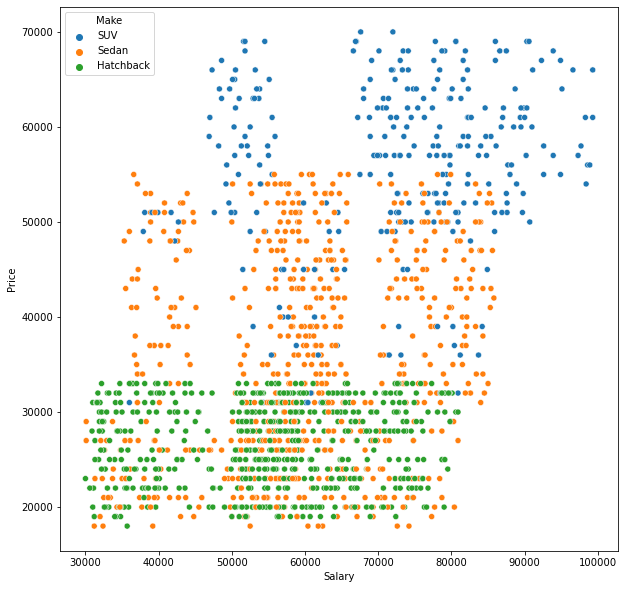

In [53]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='Salary', y='Price', hue='Make')

In [54]:
pd.crosstab(index=[df["Age_category"],df['Gender']], columns=df['Make'], margins=True)

Make                 Hatchback  SUV  Sedan   All
Age_category Gender                             
Young        Female         15   16     35    66
             Male          565    0    336   901
Middle_Aged  Female          0   68     88   156
             Male            0   42    158   200
Old          Female          0   87     18   105
             Male            0   76     22    98
All                        580  289    657  1526

##1E  
Employees working on the existing marketing campaign have made the following remarks. Based
on the data and your analysis state whether you agree or disagree with their observations. Justify your
answer Based on the data available.
E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”
E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.
E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier
target for a SUV sale over a Sedan Sale.

In [55]:
df[df['Make']=='SUV'].groupby("Gender")['Gender'].count()

Gender
Female    171
Male      118
Name: Gender, dtype: int64

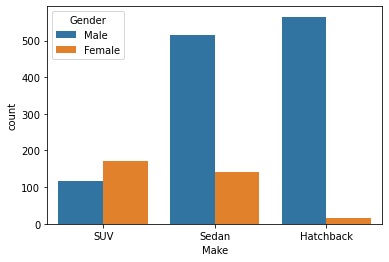

In [56]:
sns.countplot(data=df, x='Make', hue='Gender');

In [57]:
df[df['Make']=='Sedan'].groupby("Profession")["Profession"].count()

Profession
Business    287
Salaried    370
Name: Profession, dtype: int64

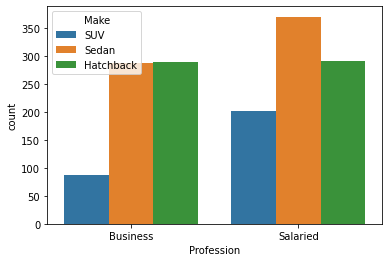

In [58]:
sns.countplot(data=df, x="Profession", hue="Make");

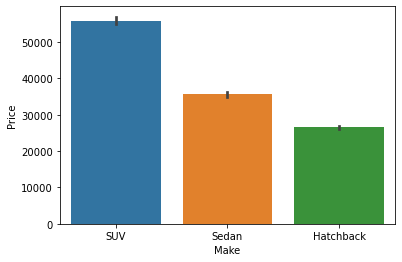

In [59]:
sns.barplot(data=df, x='Make', y='Price');

In [60]:
df[df["Profession"]=='Salaried'].groupby('Make')['Make'].count()

Make
Hatchback    291
SUV          202
Sedan        370
Name: Make, dtype: int64

In [61]:
df[(df["Gender"]=='Male') & (df["Profession"]=='Salaried')].groupby("Make")["Make"].count()

Make
Hatchback    276
SUV           85
Sedan        279
Name: Make, dtype: int64

In [62]:
pd.crosstab(index=[df['Gender'],df['Profession']], columns=df['Make'])

Make               Hatchback  SUV  Sedan
Gender Profession                       
Female Business            0   54     50
       Salaried           15  117     91
Male   Business          289   33    237
       Salaried          276   85    279

##1F
From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.

Give justification along with presenting metrics/charts used for arriving at the conclusions.

F1) Gender

F2) Personal_loan

In [63]:
df.groupby("Gender")["Price"].mean()

Gender
Female    47611.620795
Male      32817.347790
Name: Price, dtype: float64

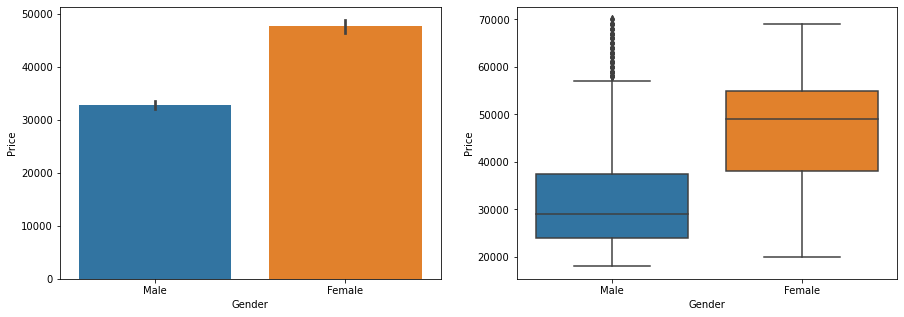

In [64]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.barplot(data=df, x='Gender', y='Price', ax=axes[0])
sns.boxplot(data=df, x='Gender', y='Price', ax=axes[1])
plt.show()

In [65]:
df.groupby("Personal_loan")["Price"].mean()

Personal_loan
No     37330.698287
Yes    34658.409387
Name: Price, dtype: float64

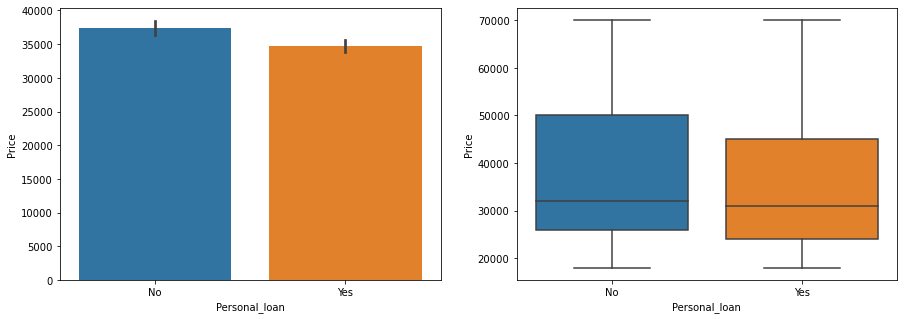

In [66]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.barplot(data=df, x='Personal_loan', y='Price', ax=axes[0])
sns.boxplot(data=df, x='Personal_loan', y='Price', ax=axes[1])
plt.show()

##1G  
From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

In [67]:
df['Price_pool'] = pd.cut(df['Price'],bins=3, labels=['Low Price','Medium Price','High Price'])

In [68]:
df.groupby('Partner_working')['Price'].mean()

Partner_working
No     36378.26087
Yes    35665.07177
Name: Price, dtype: float64

<AxesSubplot:xlabel='Partner_working', ylabel='Price'>

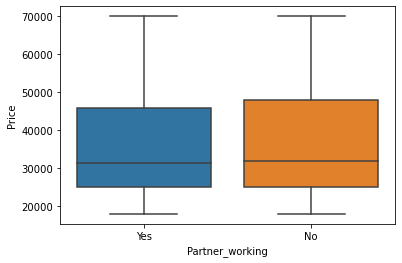

In [69]:
sns.boxplot(data=df, y='Price', x='Partner_working')

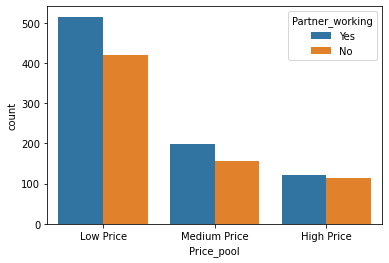

In [70]:
sns.countplot(data=df, x='Price_pool', hue='Partner_working');

##1H  
The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

In [71]:
pd.crosstab(index=[df['Gender'],df['Marital_status']], columns=df['Make'], margins=True)

Make                   Hatchback  SUV  Sedan   All
Gender Marital_status                             
Female Married                14  164    127   305
       Single                  1    7     14    22
Male   Married               484  111    493  1088
       Single                 81    7     23   111
All                          580  289    657  1526

In [72]:
df.groupby(['Gender','Marital_status'])['Price'].describe()

count          mean           std      min      25%  \
Gender Marital_status                                                         
Female Married          305.0  47819.672131  11106.109326  22000.0  39000.0   
       Single            22.0  44727.272727  12540.151963  20000.0  33500.0   
Male   Married         1088.0  32977.941176  12398.158104  18000.0  24000.0   
       Single           111.0  31243.243243  11213.803358  18000.0  24000.0   

                           50%      75%      max  
Gender Marital_status                             
Female Married         49000.0  56000.0  69000.0  
       Single          46000.0  53500.0  66000.0  
Male   Married         29000.0  38250.0  70000.0  
       Single          28000.0  33000.0  68000.0

<AxesSubplot:xlabel='Price', ylabel='Gender'>

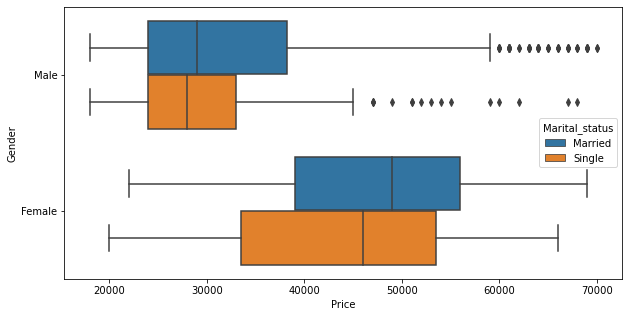

In [73]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Price', y='Gender', hue='Marital_status')